In [1]:
!pip install numpy matplotlib seaborn mesa 
!pip install jupyterlab_widgets ipywidgets

In [2]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

In [30]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")

    def say_wealth(self):
        # The agent's step will go here.
        # FIXME: need to print the agent's wealth
        print("Hi, I am an agent and I am broke!")

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1

class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        #self.agents.do("say_hi")
        # If using 'do' instead if 'shuffle_do' the order or unique id's of agents
        # will appear to be ordered (1, 2, 3, 4, ....) instead of shuffled
        # no matter the seed number is.
        #self.agents.do("say_wealth")
        self.agents.do("exchange")

# Changing seed from None to 42 results to fixed result when running the code.

In [31]:
starter_model = MoneyModel(12)
starter_model.step()

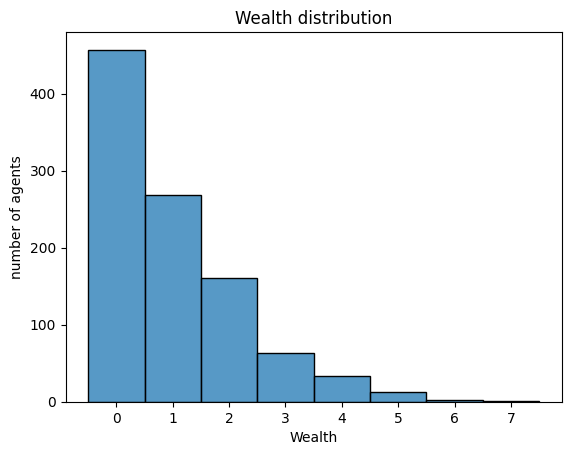

In [59]:
all_wealth = []
# This runs the model 100 times, each model executing 30 steps.
# Number of agents and model iteration affect 
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");